In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from libary import *
from recurrent import *
from ARMA import *

In [2]:
train_ratio = 0.5
valid_ratio = 0.25

# Select frequency
frequencies = ['min','5min','15min','60min','D']
frequencies_number_of_samples = np.multiply([390,78,26,7,1],252)

Frequency: min
ARMA
Period: 0, order: [2. 3.], mse: [1.03884542e-06 2.74175949e-07]
Period: 1, order: [0. 4.], mse: [4.80860242e-07 1.75738581e-07]
Period: 2, order: [5. 5.], mse: [2.18821716e-07 1.62066829e-06]
Period: 3, order: [0. 4.], mse: [2.82506809e-07 1.05911836e-07]
Period: 4, order: [5. 0.], mse: [1.12273231e-07 6.99513012e-08]
Period: 5, order: [5. 0.], mse: [8.04277091e-08 1.23472547e-07]
Period: 6, order: [4. 2.], mse: [9.40793193e-08 1.27900313e-06]
Period: 7, order: [5. 5.], mse: [1.69064340e-07 2.07636549e-07]
ARMA trining time: 339.24
LSTM
Period: 0
|   iter    |  target   | batch_... |  dropout  | first_... | layer_... | look_back | n_layers  | optimizer |
-------------------------------------------------------------------------------------------------------------
Time: 0.03
Time: 4.32


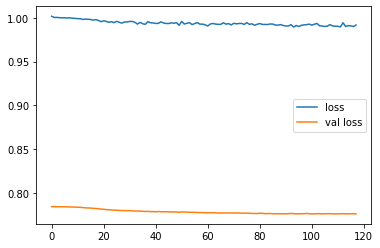

Time: 8.97
|  1        | -8.748e-0 |  9.229    |  0.3267   |  12.22    |  0.536    |  30.19    |  3.875    |  1.529    |
Time: 0.02


KeyboardInterrupt: 

In [3]:
for frequency_index in range(5):
    print(f'Frequency: {frequencies[frequency_index]}')
    number_of_study_periods, study_periods, Data, dates = creating_study_periods(frequencies,\
                                                                                 frequencies_number_of_samples,\
                                                                                 frequency_index)
    # visualize_data(Data, Returns)
    
    print('ARMA')
    ARMA_parameters, ARMA_mse, ARMA_predictions = train_ARMA(number_of_study_periods, study_periods,\
                                                             train_ratio, valid_ratio,\
                                                             frequency_index, frequencies, frequencies_number_of_samples)
    
    print('LSTM')
    LSTM_names, LSTM_mse, LSTM_predictions = train_recurrent_model('LSTM', number_of_study_periods ,study_periods,\
                                                             train_ratio, valid_ratio,\
                                                             frequency_index, frequencies, frequencies_number_of_samples)
    print('GRU')
    GRU_names, GRU_mse, GRU_predictions = train_recurrent_model('GRU', number_of_study_periods, study_periods,\
                                                             train_ratio, valid_ratio,\
                                                             frequency_index, frequencies, frequencies_number_of_samples)
    
    
    
    visualize_results((np.concatenate((np.reshape(ARMA_mse[:,-1], [number_of_study_periods,1]),\
                          np.reshape(LSTM_mse[:,-1], [number_of_study_periods,1]),\
                          np.reshape(GRU_mse[:,-1], [number_of_study_periods,1]),\
                          np.reshape(np.mean(np.square(study_periods[0,:,-ARMA_predictions.shape[1]:]),axis=1),\
                                                         [number_of_study_periods,1])), axis=1)))

In [ ]:
ARMA_mse = np.zeros((number_of_study_periods,2))
ARMA_parameters = np.zeros((number_of_study_periods,2))
ARMA_predictions = np.zeros((number_of_study_periods,study_periods.shape[2]))

visualize_results((np.concatenate((np.reshape(ARMA_mse[:,-1], [number_of_study_periods,1]),\
                          np.reshape(LSTM_mse[:,-1], [number_of_study_periods,1]),\
                          np.reshape(GRU_mse[:,-1], [number_of_study_periods,1]),\
                          np.reshape(np.mean(np.square(study_periods[0,:,-ARMA_predictions.shape[1]:]),axis=1),\
                                                         [number_of_study_periods,1])), axis=1)))
    
save_results(frequencies, frequency_index,\
              ARMA_parameters, ARMA_mse, ARMA_predictions,\
              LSTM_names, LSTM_mse, LSTM_predictions,\
              GRU_names, GRU_mse, GRU_predictions)

In [ ]:
import statsmodels.api as sm
i = 7
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(study_periods[0,i], lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(study_periods[0,i], lags=40, ax=ax2)# , lags=40